In [11]:
# **1️⃣ Import Libraries**
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
# **2️⃣ Load and Prepare Dataset**
data = load_breast_cancer()
X = data.data
y = data.target

In [13]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# **3️⃣ Train SVM Models**
# Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [15]:
# RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

SVC(C=1)

In [16]:
## **4️⃣ Evaluate Models**
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

print(f"Linear SVM Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print(f"RBF SVM Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")

Linear SVM Accuracy: 0.9561
RBF SVM Accuracy: 0.9474


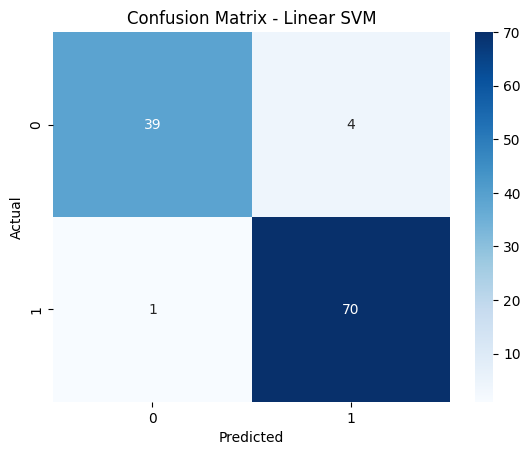

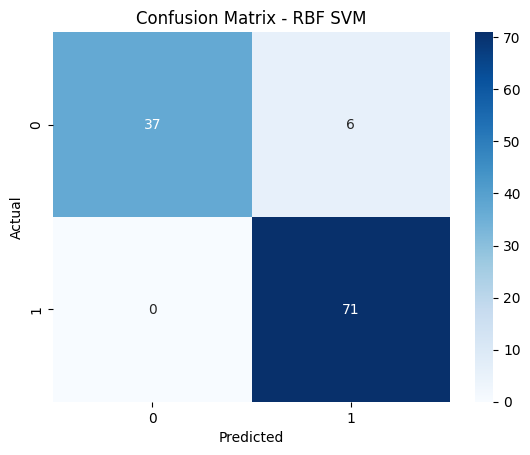

In [17]:
# **5️⃣ Confusion Matrix Visualization**
def plot_confusion(model, X_test, y_test, title):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion(svm_linear, X_test, y_test, "Confusion Matrix - Linear SVM")
plot_confusion(svm_rbf, X_test, y_test, "Confusion Matrix - RBF SVM")

In [18]:
# **6️⃣ Hyperparameter Tuning (GridSearchCV)**
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1, 1], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Score: {grid.best_score_:.4f}")

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9143


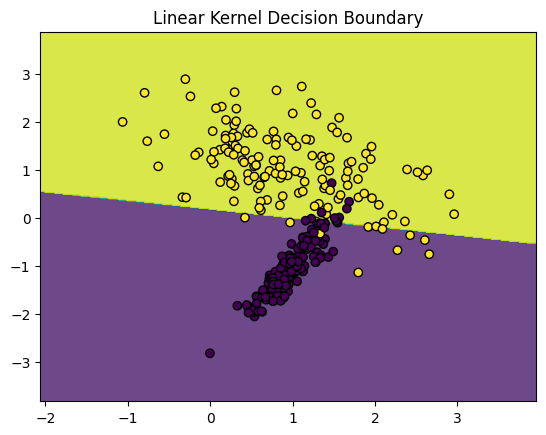

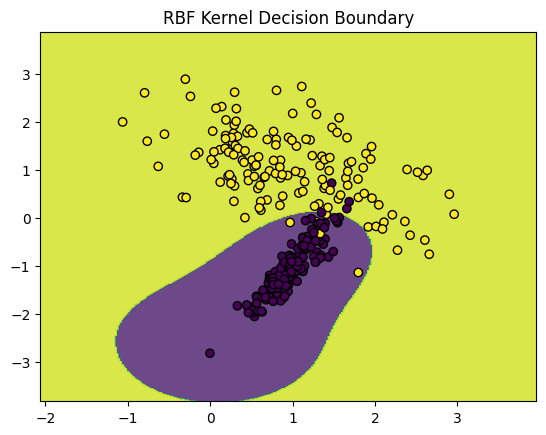

In [19]:
# **7️⃣ Decision Boundary Visualization (2D Synthetic Data)**
# Generate 2D data
X_2d, y_2d = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, random_state=42, n_clusters_per_class=1)

# Train models on 2D data
svc_linear_2d = SVC(kernel='linear').fit(X_2d, y_2d)
svc_rbf_2d = SVC(kernel='rbf').fit(X_2d, y_2d)

# Plot function
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(svc_linear_2d, X_2d, y_2d, "Linear Kernel Decision Boundary")
plot_decision_boundary(svc_rbf_2d, X_2d, y_2d, "RBF Kernel Decision Boundary")